In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from datetime import datetime
import dynetx as dn
from tqdm import tqdm
import pickle

C:\Users\wyw25\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import scipy.stats as sp
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import networkx.algorithms.community as nxcom
import scipy
import powerlaw
#from NEMtropy import UndirectedGraph, DirectedGraph
#from NEMtropy.network_functions import build_adjacency_from_edgelist
#from NEMtropy import matrix_generator
import os
import re
from os import path

## Step1: Load the dictionary of the dataframe of networks by days for calculation

In [5]:
with open('graphdicts.pkl', 'rb') as fp:
    Network = pickle.load(fp)

In [5]:
Network.keys()

dict_keys(['2018-01-12', '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04', '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-

In [6]:
Network['2018-01-20']

,Unnamed: 0,node_ID1_index,node_ID2_index,openTimeArray,openTime,closeTimeArray,closeTime,weight
0,0,1,2,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-12,0,0,37200
1,1,3,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-14,0,0,1000000
2,2,3,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15,0,0,1000000
3,3,1,5,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15,0,0,200000
4,4,6,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15,0,0,2000000
5,5,6,3,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15,0,0,1000000
6,6,3,5,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15,0,0,64300
7,7,4,7,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-16,0,0,1000000
8,8,7,5,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-16,0,0,80000
9,9,8,9,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-17,"time.struct_time(tm_year=2018, tm_mon=6, tm_md...",2018-06-09,80000


## Step2: The functions for split and slecetion

In [7]:
# function select the node we want
# eg: select the time nodeID 1000 showed up for the first time

def select_Node_ID(df,node):
    for i in df.index:
        if node==df['node_ID1_index'][i]:
            return df['openTime'][i]
        elif node==df['node_ID2_index'][i]:
            return df['openTime'][i]
        else:
            pass


In [31]:
#indlist=[1,100,500,1000,3000,5000,10000,15000,20000,25000,30000]
indlist=[10,20,50,100,200,500,1000,1500,2000,5000,10000]
yearlist=[]

In [32]:
for ind in tqdm(indlist):
    for year in Network.keys():
        df=Network[year]
        time=select_Node_ID(df,ind)
        if time is not None:
            yearlist.append(time)
            break

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [03:07<00:00, 17.08s/it]


In [33]:
yearlist

['2018-01-17',
 '2018-01-19',
 '2018-01-23',
 '2018-01-25',
 '2018-02-03',
 '2018-03-02',
 '2018-03-31',
 '2018-04-24',
 '2018-06-14',
 '2019-01-29',
 '2019-12-20']

In [34]:
yearlist=['2018-01-17',
 '2018-01-19',
 '2018-01-23',
 '2018-01-25',
 '2018-02-05',
 '2018-03-02',
 '2018-03-31',
 '2018-04-24',
 '2018-06-14',
 '2019-01-29',
 '2019-12-20']

In [ ]:
# Make the selected df into a network

In [35]:
Network_dict={}
for d in yearlist:
    G=nx.from_pandas_edgelist(Network[d], 'node_ID1_index', 'node_ID2_index', ['weight'],create_using=nx.Graph())
    Network_dict[d]=G

In [36]:
Network_dict

{'2018-01-17': <networkx.classes.graph.Graph at 0x2118431de20>,
 '2018-01-19': <networkx.classes.graph.Graph at 0x2118431d940>,
 '2018-01-23': <networkx.classes.graph.Graph at 0x2118431dc10>,
 '2018-01-25': <networkx.classes.graph.Graph at 0x2118431db20>,
 '2018-02-05': <networkx.classes.graph.Graph at 0x2118431de50>,
 '2018-03-02': <networkx.classes.graph.Graph at 0x2118431dd30>,
 '2018-03-31': <networkx.classes.graph.Graph at 0x21183f56a60>,
 '2018-04-24': <networkx.classes.graph.Graph at 0x21296e79640>,
 '2018-06-14': <networkx.classes.graph.Graph at 0x21183f56580>,
 '2019-01-29': <networkx.classes.graph.Graph at 0x21183c71fd0>,
 '2019-12-20': <networkx.classes.graph.Graph at 0x21183c71be0>}

In [ ]:
## Make a 3 elements tuples with: time, total nodes, the network
# Or make 2 dictionaries for searching

## Step3: The basic functions for network properties calculation

Count graphs by day(all days included)

In [87]:
#load the graphdict
with open('Network_dict.pkl', 'rb') as fp:
    Graph_dic = pickle.load(fp)


MemoryError: 

In [14]:
def Basic_Count(Graph):
    # by every shoot
    # total nodes 
    n_nodes=Graph.number_of_nodes()
    # total edges
    n_edges=Graph.number_of_edges()
    # total density
    n_density=nx.density(Graph)
    
    return n_nodes,n_edges,n_density

In [ ]:
Nodedic={}
Edgedic={}
Densdic={}


for dates in Graph_dic.keys():
    n_nodes,n_edges,n_density=Basic_Count(Graph_dic[dates])
    Nodedic[dates]=n_nodes
    Edgedic[dates]=n_edges
    Densdic[dates]=n_density

In [15]:
# calculate 4 centrality measures
#degree centrality
#closness centrality
#betweeness centrality
#eigenvector
def calcenmeasures(network):     
    degree_cen = nx.degree_centrality(network)   
    between_cen = nx.betweenness_centrality(network)    
    close_cen = nx.closeness_centrality(network)
    try:
        eigen_cen = nx.eigenvector_centrality(network)
    except:
        eigen_cen = {}
        print('not enough data')
    
    return degree_cen, between_cen, close_cen, eigen_cen

In [16]:
# define the function computing coefficients
# avergage clustering
# assortativity
def calcoe(network):
    avclustering=nx.average_clustering(network)
    assortativity=nx.degree_assortativity_coefficient(network)
    
    return avclustering,assortativity

In [17]:
# swtich dic to array
def switchtoarray(dic):
    arr=[]
    for d in dic:
        arr.append(np.asarray([i for i in d.values()])) 
        
    return arr  

In [18]:
# the plot of 4 centrality measures
def plotCoefficient(all_data,time,label,n1,n2):
    Label=[]
    for i in time:
        Label.append(i)

    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(12, 12))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            ax[i][j].boxplot(all_data[n])
            ax[i][j].set_xlabel('Time')
            ax[i][j].set_ylabel(label[n])
            ax[i][j].set_xticklabels(Label)
            ax[i][j].xaxis.set_major_locator(ticker.MultipleLocator(3))
            
    plt.show()

In [19]:
# can output the top result
def gethigh(DIC):
    selectlist=sorted((DIC), key=DIC.get, reverse=True)[:5]
    top=[]
    for i in selectlist:
        top.append(DIC[i])
    print(selectlist)
    print(top)

In [20]:
#plot of 
def plotavecoe(Avclustering,Assortativity,time):
    Label=[]
    for i in time:
         Label.append(i)
    
    fig, ax = plt.subplots()
    ax.plot(Avclustering,label='Avergage clustering')
    ax.plot(Assortativity,label='Assortativity')
    ax.legend()
    ax.set_xticks(range(len(time)))
    ax.set_xticklabels(Label)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
    ax.set_xlabel('Time') 
    ax.set_title('Avergage clustering & Assortativity by time')
    
    plt.show()   

In [47]:
def AvdegreeNN(network,time,n1,n2):
    Label=[]
    for i in time:
        Label.append(i)

    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(25,11))
    for i in range(n1):
        for j in range(n2):
            n=1+i*n2+j
            KNN=nx.average_degree_connectivity(network[n])
            X = [i for i in KNN.keys() ]
            Y = [i for i in KNN.values() ]
            ax[i][j].scatter(X,Y)
            ax[i][j].set_xlabel('degree k')
            ax[i][j].set_ylabel('degree knn')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xscale('log')
            ax[i][j].set_title(Label[n])
      
       
    plt.show()

In [37]:
Degree_cen=[]
Between_cen=[]
Close_cen=[]
Eigen_cen=[]
Avclustering=[]
Assortativity=[]

for year in tqdm(Network_dict.keys()):
    degree_cen, between_cen, close_cen, eigen_cen=calcenmeasures(Network_dict[year])
    avclustering,assortativity=calcoe(Network_dict[year])
    Degree_cen.append(degree_cen)
    Between_cen.append(between_cen)
    Close_cen.append( close_cen)
    Eigen_cen.append(eigen_cen)
    Avclustering.append(avclustering)
    Assortativity.append(assortativity)


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [11:48<00:00, 64.43s/it]


In [38]:
Degree_cen_arr=switchtoarray(Degree_cen)
Between_cen_arr=switchtoarray(Between_cen)
Close_cen_arr=switchtoarray(Close_cen)
Eigen_cen_arr=switchtoarray(Eigen_cen)

In [39]:
Degree_cen_arr[0]

array([0.22222222, 0.11111111, 0.33333333, 0.44444444, 0.44444444,
       0.22222222, 0.22222222, 0.11111111, 0.22222222, 0.11111111])

In [40]:
all_data=[Degree_cen_arr,Between_cen_arr,Close_cen_arr,Eigen_cen_arr]

In [41]:
i=0
deg={}
bet={}
clos={}
eig={}

for date in Network_dict.keys():
    deg[date]=list(Degree_cen_arr[i])
    bet[date]=list(Between_cen_arr[i])
    clos[date]=list(Close_cen_arr[i])
    eig[date]=list(Eigen_cen_arr[i])
    i=i+1

In [192]:
with open("deg_test.pkl", "wb") as fp:   #Pickling
    pickle.dump(deg, fp)

In [193]:
with open("bet_test.pkl", "wb") as fp:   #Pickling
    pickle.dump(bet, fp)

In [194]:
with open("clos_test.pkl", "wb") as fp:   #Pickling
    pickle.dump(clos, fp)

In [195]:
with open("eig_test.pkl", "wb") as fp:   #Pickling
    pickle.dump(eig, fp)

In [199]:
with open("avclust_test.pkl", "wb") as fp:   #Pickling
    pickle.dump(Avclustering, fp)

In [200]:
with open("assor_test.pkl", "wb") as fp:   #Pickling
    pickle.dump(Assortativity, fp)

In [203]:
deg

{'2018-01-12': [1.0, 1.0],
 '2018-01-25': [0.029126213592233007,
  0.009708737864077669,
  0.19417475728155337,
  0.08737864077669902,
  0.13592233009708737,
  0.019417475728155338,
  0.21359223300970873,
  0.019417475728155338,
  0.058252427184466014,
  0.009708737864077669,
  0.038834951456310676,
  0.04854368932038834,
  0.009708737864077669,
  0.029126213592233007,
  0.35922330097087374,
  0.009708737864077669,
  0.04854368932038834,
  0.029126213592233007,
  0.009708737864077669,
  0.08737864077669902,
  0.08737864077669902,
  0.058252427184466014,
  0.019417475728155338,
  0.019417475728155338,
  0.019417475728155338,
  0.009708737864077669,
  0.038834951456310676,
  0.019417475728155338,
  0.009708737864077669,
  0.009708737864077669,
  0.038834951456310676,
  0.038834951456310676,
  0.009708737864077669,
  0.009708737864077669,
  0.019417475728155338,
  0.08737864077669902,
  0.009708737864077669,
  0.009708737864077669,
  0.019417475728155338,
  0.019417475728155338,
  0.00970

In [27]:
list(Network_dict.keys())

['2018-01-17',
 '2018-01-19',
 '2018-01-23',
 '2018-01-25',
 '2018-02-05',
 '2018-03-02',
 '2018-03-31',
 '2018-04-24',
 '2018-06-14']

In [273]:
all_data

[[array([1., 1.]),
  array([0.02912621, 0.00970874, 0.19417476, 0.08737864, 0.13592233,
         0.01941748, 0.21359223, 0.01941748, 0.05825243, 0.00970874,
         0.03883495, 0.04854369, 0.00970874, 0.02912621, 0.3592233 ,
         0.00970874, 0.04854369, 0.02912621, 0.00970874, 0.08737864,
         0.08737864, 0.05825243, 0.01941748, 0.01941748, 0.01941748,
         0.00970874, 0.03883495, 0.01941748, 0.00970874, 0.00970874,
         0.03883495, 0.03883495, 0.00970874, 0.00970874, 0.01941748,
         0.08737864, 0.00970874, 0.00970874, 0.01941748, 0.01941748,
         0.00970874, 0.01941748, 0.01941748, 0.03883495, 0.13592233,
         0.04854369, 0.00970874, 0.01941748, 0.00970874, 0.02912621,
         0.00970874, 0.00970874, 0.02912621, 0.10679612, 0.00970874,
         0.01941748, 0.00970874, 0.02912621, 0.00970874, 0.00970874,
         0.00970874, 0.00970874, 0.00970874, 0.00970874, 0.04854369,
         0.03883495, 0.00970874, 0.00970874, 0.00970874, 0.01941748,
         0.0194

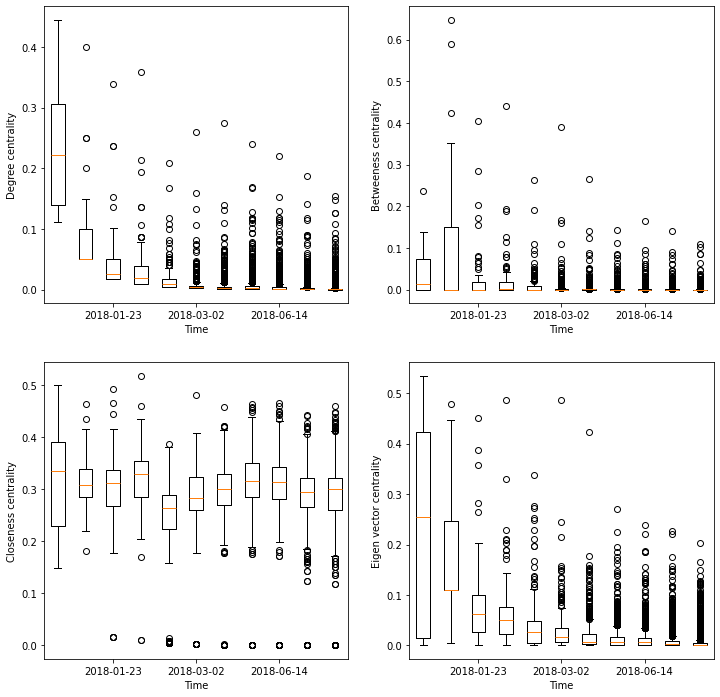

In [42]:
plotCoefficient(all_data,list(Network_dict.keys()) ,['Degree centrality','Betweeness centrality','Closeness centrality','Eigen vector centrality'],2,2)

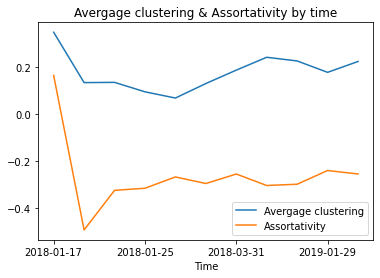

In [43]:
plotavecoe(Avclustering,Assortativity,list(Network_dict.keys()))

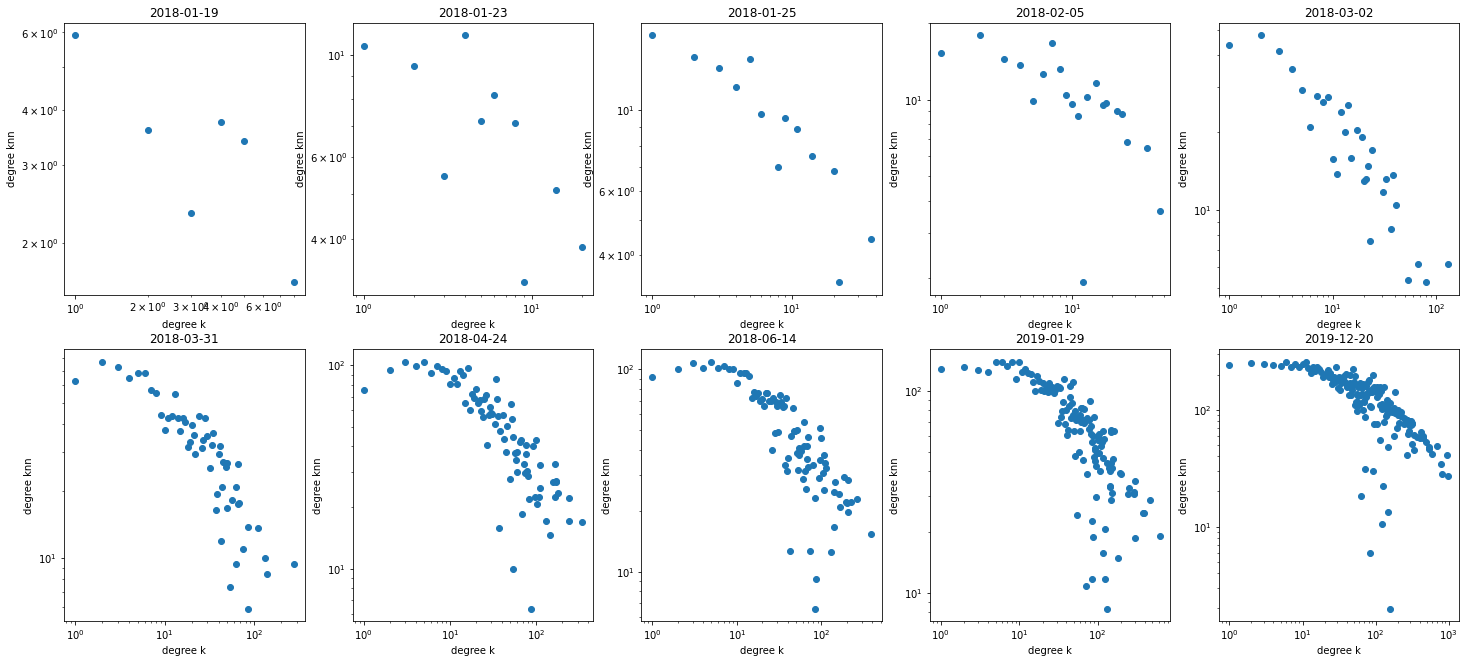

In [48]:
AvdegreeNN(list(Network_dict.values()),list(Network_dict.keys()),2,5)  

## Step4: Gini Coefficient with Centralization index 

function for centralization index

In [49]:
# degree-centralization
def degree_centralization(K):
    k_=max(K)
    N=len(K)
    numerator=0
    for i in range(N):
        numerator=numerator+k_-K[i]
    ind=numerator/((N-1)*(N-2))
    
    return ind



In [50]:
# clossness-centralization
def clossness_centralization(C):
    c_=max(C)
    N=len(C)
    numerator=0
    for i in range(N):
        numerator=numerator+c_-C[i]
    
    ind=numerator/((N-1)*(N-2)/(2*N-3))
    
    return ind


In [51]:
# betweeness-centralization
def betweeness_centralization(B):
    b_=max(B)
    N=len(B)
    numerator=0
    for i in range(N):
        numerator=numerator+b_-B[i]
    
    ind=numerator/((N-1)*(N-1)*(N-2)/2)
    
    return ind


In [52]:
# eigenvector-centralization
def eigenvector_centralization(E):
    e_=max(E)
    N=len(E)
    numerator=0
    for i in range(N):
        numerator=numerator+e_-E[i]
    
    ind=numerator/(((np.sqrt(N-1)-1)*(N-1))/(np.sqrt(N-1)+N-1))
    
    return ind


In [53]:
# run for calculation
degree_cen_ind={}
clossness_cen_ind={}
betweeness_cen_ind={}
eigenvector_cen_ind={}

for i in Network_dict.keys():
    degree_cen_ind[i]=degree_centralization(deg[i])
    clossness_cen_ind[i]=clossness_centralization(bet[i])
    betweeness_cen_ind[i]=betweeness_centralization(clos[i])
    eigenvector_cen_ind[i]=eigenvector_centralization(eig[i])

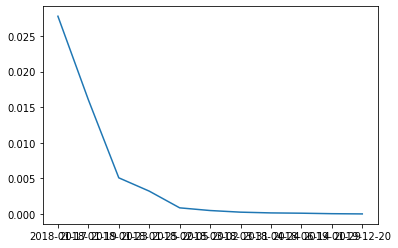

In [54]:
lists = sorted(degree_cen_ind.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()


In [55]:
deg

{'2018-01-17': [0.2222222222222222,
  0.1111111111111111,
  0.3333333333333333,
  0.4444444444444444,
  0.4444444444444444,
  0.2222222222222222,
  0.2222222222222222,
  0.1111111111111111,
  0.2222222222222222,
  0.1111111111111111],
 '2018-01-19': [0.15000000000000002,
  0.05,
  0.25,
  0.25,
  0.2,
  0.1,
  0.1,
  0.1,
  0.1,
  0.05,
  0.05,
  0.1,
  0.05,
  0.05,
  0.4,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05],
 '2018-01-23': [0.05084745762711865,
  0.01694915254237288,
  0.23728813559322035,
  0.1016949152542373,
  0.13559322033898305,
  0.03389830508474576,
  0.15254237288135594,
  0.03389830508474576,
  0.05084745762711865,
  0.01694915254237288,
  0.03389830508474576,
  0.0847457627118644,
  0.01694915254237288,
  0.05084745762711865,
  0.3389830508474576,
  0.01694915254237288,
  0.05084745762711865,
  0.01694915254237288,
  0.01694915254237288,
  0.1016949152542373,
  0.0847457627118644,
  0.06779661016949153,
  0.01694915254237288,
  0.03389830508474576,
  0.033898305

In [56]:
degree_cen_ind

{'2018-01-17': 0.027777777777777773,
 '2018-01-19': 0.016052631578947377,
 '2018-01-23': 0.005091679957206107,
 '2018-01-25': 0.0032233083637828817,
 '2018-02-05': 0.0008776158629765173,
 '2018-03-02': 0.0004998420634142634,
 '2018-03-31': 0.0002701813751340205,
 '2018-04-24': 0.00016566011613352975,
 '2018-06-14': 0.00012443788679872476,
 '2019-01-29': 5.589115691798398e-05,
 '2019-12-20': 2.4203459994968733e-05}

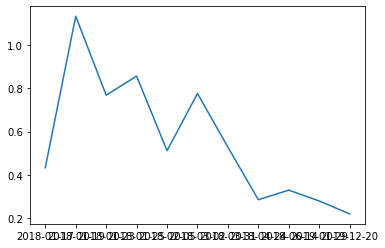

In [57]:
lists = sorted(clossness_cen_ind.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()


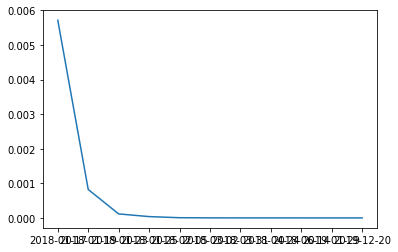

In [58]:
lists = sorted(betweeness_cen_ind.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()


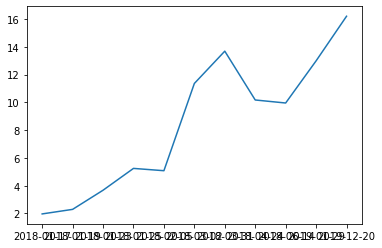

In [59]:
lists = sorted(eigenvector_cen_ind.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()


In [60]:
# Gini coefficient
def Gini_coefficient(C):
    N=len(C)
    numerator=0
    divider=0
    for i in range(N):
        for j in range(N):
            numerator=numerator+abs(C[i]-C[j])
        divider=divider+C[i]
    ind=numerator/(divider*2*N)
    
    return ind


In [61]:
# run for calculation
degree_gini={}
clossness_gini={}
betweeness_gini={}
eigenvector_gini={}

for i in tqdm(Network_dict.keys()):
    degree_gini[i]=Gini_coefficient(deg[i])
    betweeness_gini[i]=Gini_coefficient(bet[i])
    clossness_gini[i]=Gini_coefficient(clos[i])
    eigenvector_gini[i]=Gini_coefficient(eig[i])

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:47<00:00,  4.32s/it]


In [62]:
def Pic_gini(DIC,label,n1,n2):
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(20, 4))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            x, y = zip(*DIC[n]) 
            ax[j].scatter(x,y)
            ax[j].set_xlabel('Time')
            ax[j].set_ylabel(label[n])
            ax[j].set_ylim(0,1)
            ax[j].xaxis.set_major_locator(ticker.MultipleLocator(3))
            
    plt.show()
    

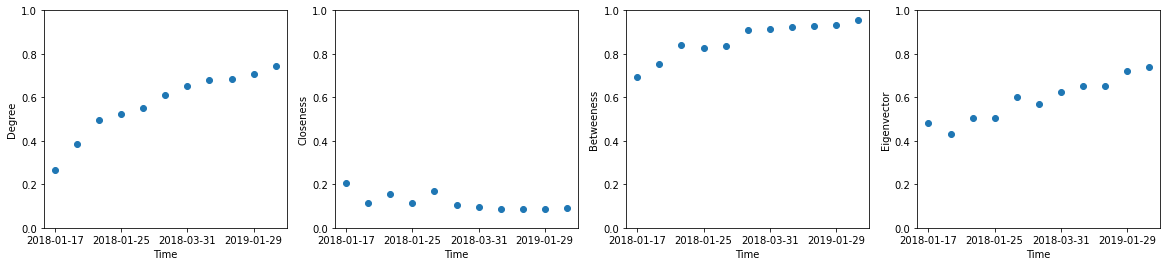

In [63]:
lists1 = sorted(degree_gini.items()) # sorted by key, return a list of tuples
lists2 = sorted(clossness_gini.items()) # sorted by key, return a list of tuples
lists3 = sorted(betweeness_gini.items()) # sorted by key, return a list of tuples
lists4 = sorted(eigenvector_gini.items()) # sorted by key, return a list of tuples
gini_list=[lists1,lists2,lists3,lists4]

Pic_gini(gini_list,['Degree','Closeness','Betweeness','Eigenvector'],1,4)

In [181]:
Network_dict.keys()

dict_keys(['2018-01-12', '2018-01-25', '2018-03-02', '2018-03-31', '2018-09-21', '2019-01-29', '2019-12-20', '2021-01-05', '2021-05-24', '2021-08-26', '2021-11-25'])

In [249]:
def Pic_gini_node(DIC,noden,label,n1,n2):
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(20, 4))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            x, y = zip(*DIC[n]) 
            ax[j].scatter(noden,list(y))
            ax[j].set_xlabel('Time')
            ax[j].set_ylim(0,1)
            ax[j].set_ylabel(label[n])
            ax[j].set_xscale("log")
            #ax[j].xaxis.set_major_locator(ticker.MultipleLocator(3))
            
    plt.show()
    

In [233]:
noden=[2,
104,
506,
1000,
2250,
3302,
6345,
8641,
11922,
15659,
19479]

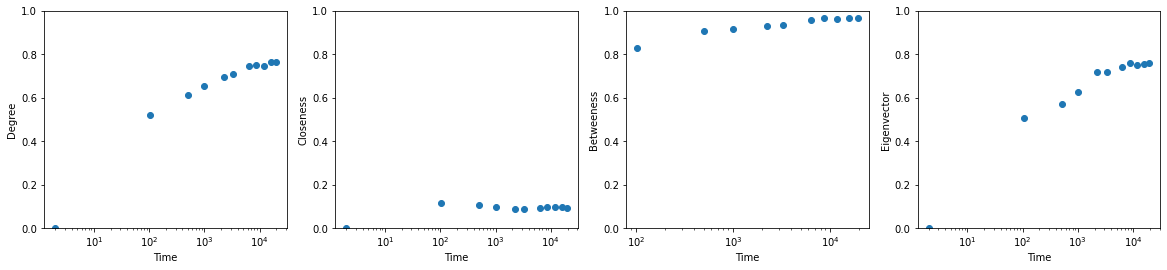

In [250]:
Pic_gini_node(gini_list,noden,['Degree','Closeness','Betweeness','Eigenvector'],1,4)